In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df = pd.DataFrame({'Gender' : ['M', 'M', 'M', 'F', 'F'] * 10,
                   'isSmoker' : ['Smoker', 'Smoker', 'Non-Smoker', 'Non-Smoker', 'Smoker'] * 10,
                   'has_cancer' : ['Yes', 'No', 'Yes', 'No', 'Yes'] * 10
                  })
df.head()

,Gender,isSmoker,has_cancer
0,M,Smoker,Yes
1,M,Smoker,No
2,M,Non-Smoker,Yes
3,F,Non-Smoker,No
4,F,Smoker,Yes


In [15]:
df.count()

Gender        50
isSmoker      50
has_cancer    50
dtype: int64

In [16]:
# To run the Chi-Square Test, the easiest way is to convert the data into a contingency table with frequencies.
# We will use the crosstab command from pandas.
contingency = pd.crosstab(df['Gender'], df['isSmoker'], df['has_cancer'], aggfunc=len)
contingency


isSmoker,Non-Smoker,Smoker
Gender,,
F,10,10
M,10,20


In [5]:
# get the percentages by Gender (row)
contigency_pct = pd.crosstab(df['Gender'], df['isSmoker'], normalize='index')
contigency_pct

isSmoker,Non-Smpoker,Smoker
Gender,,
F,0.500000,0.500000
M,0.333333,0.666667


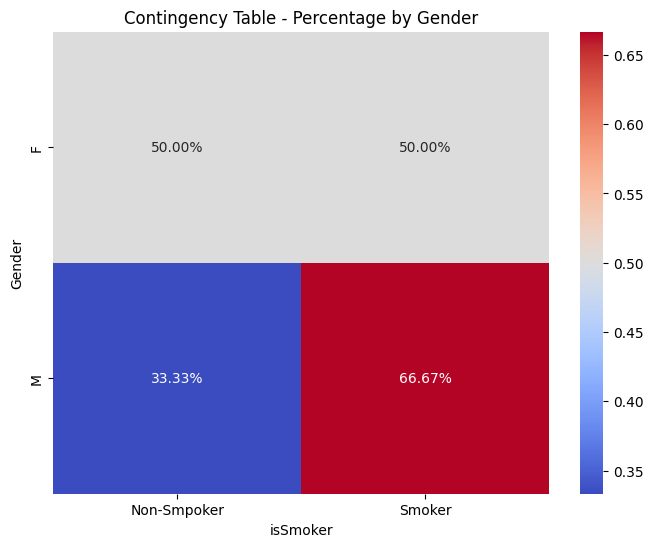

In [6]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contigency_pct, annot=True, cmap='coolwarm', fmt=".2%")

plt.title('Contingency Table - Percentage by Gender')
plt.show()

In [17]:
# Compute the chi-square statistic and p-value
chi2, p, dof, expected_counts = chi2_contingency(contigency_pct)

# Print the results
print('Chi-square statistic:', chi2)
print('P-value:', p)
print('Degrees of freedom:', dof)
print('Expected counts:')
print(expected_counts)

Chi-square statistic: 0.0
P-value: 1.0
Degrees of freedom: 1
Expected counts:
[[0.41666667 0.58333333]
 [0.41666667 0.58333333]]
